# Explorartory Data Analysis

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# pip install IPython and librosa if we have not already done so
import IPython.display as ipd
import librosa
import librosa.display

## Data Acquisition

#### DESCRIPTION
This dataset contains 8732 labeled sound excerpts (<=4s) of urban sounds from 10 classes: air_conditioner, car_horn, children_playing, dog_bark, drilling, enginge_idling, gun_shot, jackhammer, siren, and street_music. The classes are drawn from the [urban sound taxonomy](https://urbansounddataset.weebly.com/taxonomy.html). For a detailed description of the dataset and how it was compiled please refer to the [article](http://www.justinsalamon.com/uploads/4/3/9/4/4394963/salamon_urbansound_acmmm14.pdf).

All excerpts are taken from field recordings uploaded to www.freesound.org. The files are pre-sorted into ten folds (folders named fold1-fold10) to help in the reproduction of and comparison with the automatic classification results reported in the article above.

In addition to the sound excerpts, a CSV file containing metadata about each excerpt is also provided

#### AUDIO FILES INCLUDED
8732 audio files of urban sounds (see description above) in WAV format. The sampling rate, bit depth, and number of channels are the same as those of the original file uploaded to Freesound (and hence may vary from file to file).

#### META-DATA FILES INCLUDED
UrbanSound8k.csv

This file contains meta-data information about every audio file in the dataset. This includes:

* slice_file_name: 
The name of the audio file. The name takes the following format: [fsID]-[classID]-[occurrenceID]-[sliceID].wav, where:
[fsID] = the Freesound ID of the recording from which this excerpt (slice) is taken
[classID] = a numeric identifier of the sound class (see description of classID below for further details)
[occurrenceID] = a numeric identifier to distinguish different occurrences of the sound within the original recording
[sliceID] = a numeric identifier to distinguish different slices taken from the same occurrence

* fsID:
The Freesound ID of the recording from which this excerpt (slice) is taken

* start
The start time of the slice in the original Freesound recording

* end:
The end time of slice in the original Freesound recording

* salience:
A (subjective) salience rating of the sound. 1 = foreground, 2 = background.

* fold:
The fold number (1-10) to which this file has been allocated.

* classID:
A numeric identifier of the sound class:
0 = air_conditioner
1 = car_horn
2 = children_playing
3 = dog_bark
4 = drilling
5 = engine_idling
6 = gun_shot
7 = jackhammer
8 = siren
9 = street_music

* class:
The class name: air_conditioner, car_horn, children_playing, dog_bark, drilling, engine_idling, gun_shot, jackhammer, 
siren, street_music.

#### DATA SOURCE: 
https://urbansounddataset.weebly.com/urbansound8k.html

#### DATA SOURCE CREATED BY:
[Justin Salamon](https://www.justinsalamon.com/), Christopher Jacoby, and Juan Pablo Bello
Music and Audio Research Laboratory (MARL), New York University
Center for Urban Science and Progress (CUSP), New York University

In [48]:
dir ="../data/UrbanSound8K/audio/"

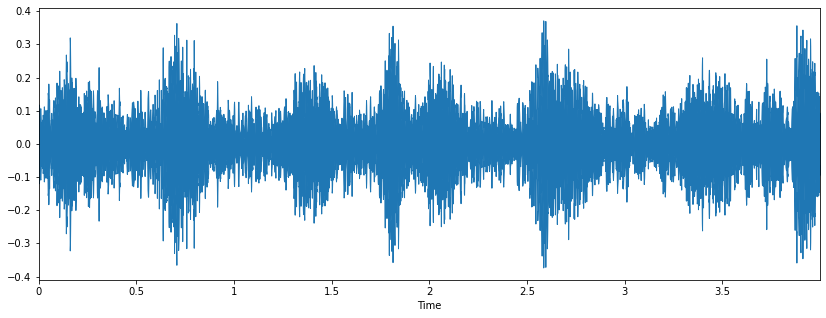

In [49]:
# sound checking
plt.figure(figsize=(14,5))
fn = dir+"fold1/57320-0-0-42.wav"
data,sample_rate=librosa.load(fn)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(fn)

In audio production, a sample rate (or "sampling rate") defines how many times per second a sound is sampled. Technically speaking, it is the frequency of samples used in a digital recording.

The standard sample rate used for audio CDs is 44.1 kilohertz (44,100 hertz). That means each second of a song on a CD contains 44,100 individual samples. When an analog sound, such as a vocal performance, is sampled at a rate of tens of thousands of times per second, the digital recording may be nearly indistinguishable from the original analog sound.

CDs use a sample rate of 44.1 KHz because it allows for a maximum audio frequency of 22.05 kilohertz. The human ear can detect sounds from roughly 20 hertz to 20 kilohertz, so there is little reason to record at higher sample rates. However, because digital audio recordings are estimations of analog audio, a smoother sound can be gained by increasing the sample rate above 44.1 KHz. Examples of high sample rates include 48 KHz (used for DVD video), 88.2 KHz (2x the rate of CD audio), and 96 KHz (used for DVD-Audio and other high definition audio formats).

While audio aficionados may appreciate higher sample rates, it is difficult for most people to perceive an improvement in audio quality when the sample rate is higher than 44.1 Khz. A more effective way to improve the quality of digital audio is to increase the bit depth, which determines amplitude range of each sample. 16-bit audio, used in audio CDs, provides 216 or 65,536 possible amplitude values. 24-bit audio, used in high definition formats, can store 224 or 16,777,216 possible amplitude values – 256 times more than 16-bit audio.

NOTE: Many DAW programs support sample rates up to 192 KHz. Recording at extremely high sample rates allows sound engineers to preserve the audio quality during the mixing and editing process. This can improve the end result of a song or audio clip even if the final version is saved with a sample rate of 44.1 Hz.
Source: https://techterms.com/definition/sample_rate

In [50]:
print("Sample Rate: ", sample_rate)

Sample Rate:  22050


Let us read the same audio file in SciPy audio library. Librosa will try to sample audio 22.05Khz where as Scipy may give the actual sample rate. 

In [51]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(fn)

In [52]:
print("Wave_sample_rate: ", wave_sample_rate)

Wave_sample_rate:  44100


Let's also look at the content of wave_audio

![wave](../images/Sound-wave.png)

In [53]:
wave_audio

array([[-2193, -1698],
       [-2249, -1942],
       [-2272, -2015],
       ...,
       [ -477,  -885],
       [ -302,   886],
       [  148,  2075]], dtype=int16)

In [54]:
type(wave_audio)

numpy.ndarray

scipy.io wav file read format returns numpy ndarry, which is not normalized.

Check the type and values of 'data' which is read with librosa.

In [55]:
data

array([-0.04427635, -0.07188664, -0.07754568, ..., -0.09202494,
       -0.05372443,  0.01355415], dtype=float32)

In [56]:
type(data)

numpy.ndarray

librosa wav file reading also returs numpy ndarry, but the values are in a different format which seem to return normalized values.
1) audio is mono<BR>
2) values are  beween -1 and +1.<BR>
3) sample rate is 22.05KHz.<BR>

In [59]:
metadata = pd.read_csv("../data/UrbanSound8K/metadata/UrbanSound8K.csv")

In [60]:
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


There are 0 classes of sounds and fairly in good balance.

In [63]:
metadata["class"].value_counts()

children_playing    1000
drilling            1000
jackhammer          1000
air_conditioner     1000
dog_bark            1000
street_music        1000
engine_idling       1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64